In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
#https://github.com/thanhhau097/Natual-Language-Processing/blob/master/Text%20Classifier/Vietnamese%20Newspaper%20Text%20Classifier%2010%20Topics.ipynb

In [11]:
!pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 3.0 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP
from unidecode import unidecode
# report the best model
# from sklearn.metrics.ConfusionMatrixDisplay import plot_confusion_matrix,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [8]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [12]:
real_data = pd.read_csv("/home/trung/Documents/AI/name_classifier/name_classification/1.csv")

In [13]:
real_data

,MaKH,name
0,0,tran duc dung
1,1,hoang thi linh
2,2,hoang thi thuy
3,3,nguyen thi loan
4,4,pham thi thuy hien
...,...,...
9995,9995,ngo van thoan
9996,9996,luc thi hoi
9997,9997,cao duc manh
9998,9998,pham trung thuc


In [18]:
import pickle
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
from unidecode import unidecode


In [ ]:
name_classification = model(
    model_path='./xgboost_name_classification.pkl')

In [3]:
real_data = pd.read_excel("data/non_person.xlsx")
real_data.head()

,name,label
0,HO KD CUA HANG KDTH NGOC DUC,0
1,CT TNHH DT VA TM MINH PHUONG NAM HN,0
2,DOAN TNCSHCM TRUONG DHBK HN,0
3,DN TU NHAN THAO HUNG,0
4,CT RPBM KHU NHA O CBQD,0


In [22]:
test_dt = pd.read_csv("/home/trung/Documents/AI/name_classifier/result_testing00000003.csv")

In [23]:
test_dt

,Unnamed: 0,name,Prediction result,pro non_persion
0,0,ho quy nhan,1,0.006134
1,1,lam thi thanh xuan,1,0.017681
2,2,tran van mien,1,0.003329
3,3,nguyen ngoc dung,1,0.001727
4,4,quang thi nhung,1,0.024246
...,...,...,...,...
9995,9995,hoang thi hong,1,0.007876
9996,9996,pham anh dung,1,0.001448
9997,9997,nguyen thi xuan,1,0.000482
9998,9998,trinh thuy dung,1,0.003319


In [4]:
full_name =[]
label = []
for i in real_data.index:
    full_name.append(unidecode(real_data["name"][i]).lower())
    label.append(real_data["label"][i])
print("Done")
print(full_name[0:5])

Done
['ho kd cua hang kdth ngoc duc', 'ct tnhh dt va tm minh phuong nam hn', 'doan tncshcm truong dhbk hn', 'dn tu nhan thao hung', 'ct rpbm khu nha o cbqd']


In [5]:
# Convert to dataframe and labeling
real_data = pd.DataFrame([full_name, label])
real_data = real_data.transpose()
real_data.columns = ["name", "label"]
real_data.head()

,name,label
0,ho kd cua hang kdth ngoc duc,0
1,ct tnhh dt va tm minh phuong nam hn,0
2,doan tncshcm truong dhbk hn,0
3,dn tu nhan thao hung,0
4,ct rpbm khu nha o cbqd,0


In [6]:
real_x = real_data["name"]
real_y = real_data["label"]

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    244
1      2
Name: label, dtype: int64

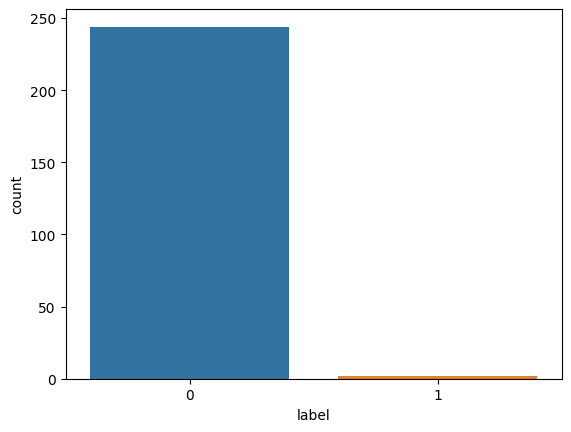

In [7]:
# Distribution of the Target variable.
sns.countplot(real_y)
real_y.value_counts()

In [8]:
data_train = pd.read_csv("data_train_moredata4.csv")
data_test = pd.read_csv("data_test_moredata4.csv")

In [9]:
y_train = data_train["label"]
y_test = data_test["label"]

In [10]:
x_train = data_train["name"]
x_test = data_test["name"]

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    27555
1    20525
Name: label, dtype: int64

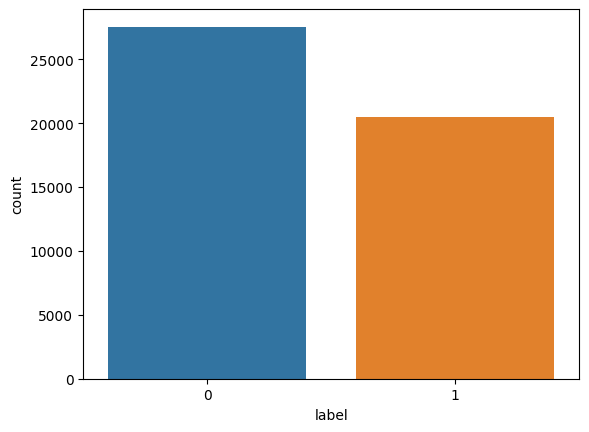

In [11]:
# Distribution of the Target variable.
sns.countplot(data_train["label"])
data_train["label"].value_counts()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(x_train)

# transform the training and validation data using count vectorizer object
X_data_count = count_vect.transform(x_train)
X_test_count = count_vect.transform(x_test)
real_count = count_vect.transform(real_x)

In [13]:
# word level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(x_train) # learn vocabulary and idf from training set
X_data_tfidf =  tfidf_vect.transform(x_train)
# assume that we don't have test set before
X_test_tfidf =  tfidf_vect.transform(x_test)
real_tfidf =  tfidf_vect.transform(real_x)

In [14]:
# ngram level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram.fit(x_train)
X_data_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
# assume that we don't have test set before
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)
real_tfidf_ngram =  tfidf_vect_ngram.transform(real_x)

In [15]:
# ngram-char level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram_char = TfidfVectorizer(analyzer='char', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram_char.fit(x_train)
X_data_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(x_train)
# assume that we don't have test set before
X_test_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(x_test)
real_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(real_x)

In [16]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_data_tfidf)

X_data_tfidf_svd = svd.transform(X_data_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

In [17]:
svd_ngram = TruncatedSVD(n_components=300, random_state=42)
svd_ngram.fit(X_data_tfidf_ngram)

X_data_tfidf_ngram_svd = svd_ngram.transform(X_data_tfidf_ngram)
X_test_tfidf_ngram_svd = svd_ngram.transform(X_test_tfidf_ngram)

In [18]:
svd_ngram_char = TruncatedSVD(n_components=300, random_state=42)
svd_ngram_char.fit(X_data_tfidf_ngram_char)

X_data_tfidf_ngram_char_svd = svd_ngram_char.transform(X_data_tfidf_ngram_char)
X_test_tfidf_ngram_char_svd = svd_ngram_char.transform(X_test_tfidf_ngram_char)

In [19]:
from gensim.models import KeyedVectors 
word2vec_model_path = "pretrained_model/vi.vec"
w2v = KeyedVectors.load_word2vec_format(word2vec_model_path)
vocab = w2v.wv.vocab
wv = w2v.wv

def get_word2vec_data(X):
    word2vec_data = []
    for x in X:
        sentence = []
        for word in x.split(" "):
            if word in vocab:
                sentence.append(wv[word])

        word2vec_data.append(sentence)

    return word2vec_data

X_data_w2v = get_word2vec_data(x_train)
X_test_w2v = get_word2vec_data(x_test)

/tmp/ipykernel_9152/3450831678.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vocab = w2v.wv.vocab
/tmp/ipykernel_9152/3450831678.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  wv = w2v.wv


In [20]:
y_train.values

array([1, 0, 0, ..., 1, 1, 1])

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = LabelEncoder()
y_data_n = encoder.fit_transform(y_train)
y_test_n = encoder.fit_transform(y_test)
encoder.classes_

array([0, 1])

In [22]:
######### Modeling #############
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def plot_confusion_matrix_custom(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def over_sampling(X_train, y_train):
    oversample = SMOTE(random_state = 42)
    x_smote, y_smote = oversample.fit_resample(X_train, y_train)
    return x_smote, y_smote

In [23]:
def train_model(classifier, X_data, y_data, X_test, y_test, is_neuralnet=False, n_epochs=20):       
    #x_smote, y_smote = over_sampling(X_data, y_data)
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)
    
    if is_neuralnet:
        classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=512, class_weight = class_weight)
        
        train_predictions = classifier.predict(X_train)
        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(X_test)
        train_predictions = train_predictions.argmax(axis=-1)
        val_predictions = val_predictions.argmax(axis=-1)
        test_predictions = test_predictions.argmax(axis=-1)
        plot_confusion_matrix_custom(confusion_matrix(y_test, test_predictions), classes=[0,1])
        

    else:
        classifier.fit(X_train, y_train)
    
        train_predictions = classifier.predict(X_train)
        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(X_test)
    
        ConfusionMatrixDisplay(classifier, X_test, y_test, display_labels=["non_person", "person"])
        plt.grid(False)
        plt.show()
        
    print("Độ chính xác trên tập huấn luyện: ", metrics.accuracy_score(train_predictions, y_train))    
    print("Độ chính xác trên tập Validation: ", metrics.accuracy_score(val_predictions, y_val))
    print("Độ chính xác trên tập kiểm thử: ", metrics.accuracy_score(test_predictions, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    tnr = tn/(tn + fp)
    print("Tỷ lệ phát hiện không phải tên người: %f" % tnr)
    tpr = tp / (tp + fn)
    print("Tỷ lệ phát hiện tên người: %f" % tpr)
    return classifier

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


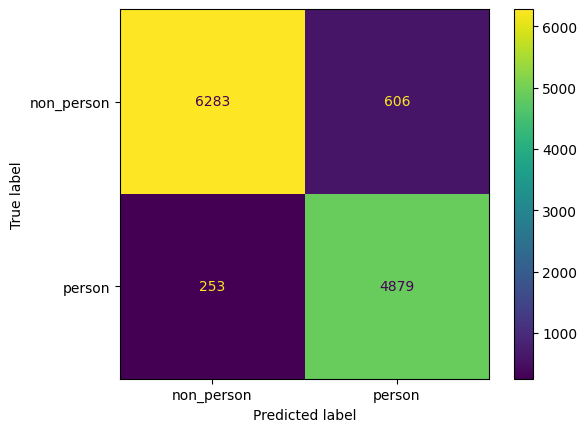

Độ chính xác trên tập huấn luyện:  0.9285912368275097
Độ chính xác trên tập Validation:  0.9209650582362728
Độ chính xác trên tập kiểm thử:  0.9285417186590134
Tỷ lệ phát hiện không phải tên người: 0.912034
Tỷ lệ phát hiện tên người: 0.950701


MultinomialNB()

In [24]:
train_model(naive_bayes.MultinomialNB(), X_data_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


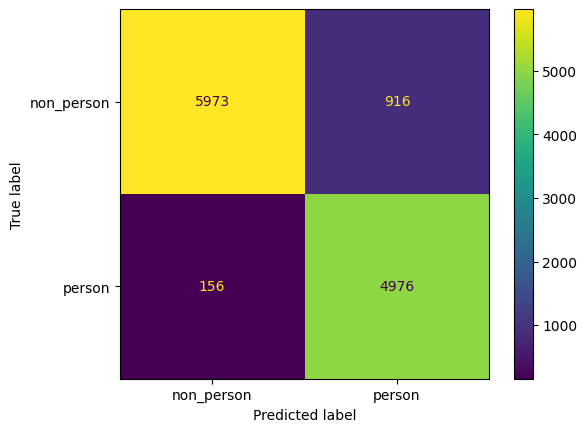

Độ chính xác trên tập huấn luyện:  0.9135006470696987
Độ chính xác trên tập Validation:  0.9055740432612313
Độ chính xác trên tập kiểm thử:  0.9108227268946011
Tỷ lệ phát hiện không phải tên người: 0.867034
Tỷ lệ phát hiện tên người: 0.969602


BernoulliNB()

In [25]:
train_model(naive_bayes.BernoulliNB(), X_data_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


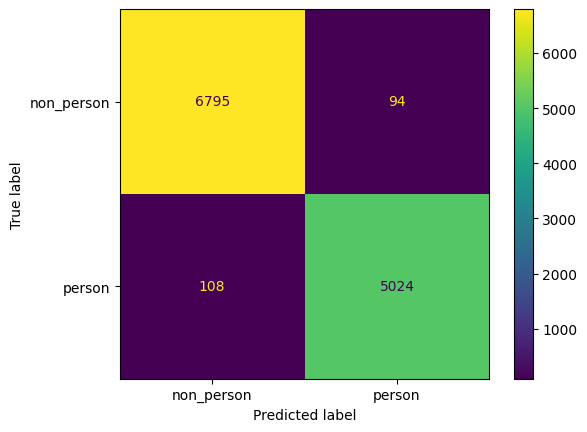

Độ chính xác trên tập huấn luyện:  0.9853253836198927
Độ chính xác trên tập Validation:  0.9825291181364393
Độ chính xác trên tập kiểm thử:  0.9831960735379752
Tỷ lệ phát hiện không phải tên người: 0.986355
Tỷ lệ phát hiện tên người: 0.978956


LogisticRegression()

In [26]:
train_model(linear_model.LogisticRegression(),  X_data_tfidf_ngram_char_svd, y_train,  X_test_tfidf_ngram_char_svd, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


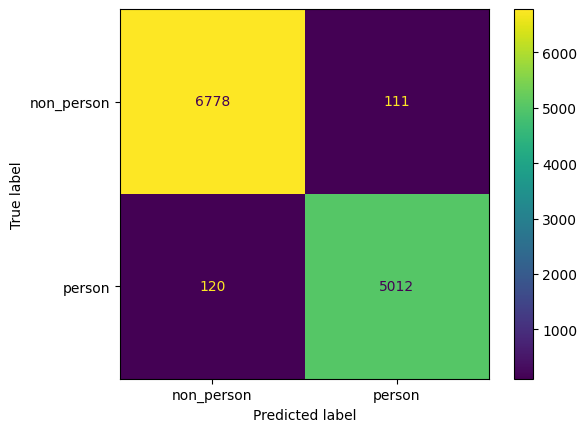

Độ chính xác trên tập huấn luyện:  0.982274912183398
Độ chính xác trên tập Validation:  0.9812811980033278
Độ chính xác trên tập kiểm thử:  0.9807836286498628
Tỷ lệ phát hiện không phải tên người: 0.983887
Tỷ lệ phát hiện tên người: 0.976617


LogisticRegression()

In [27]:
train_model(linear_model.LogisticRegression(), X_data_tfidf_svd, y_train, X_test_tfidf_svd, y_test, is_neuralnet=False)

In [ ]:
train_model(svm.SVC(), X_data_tfidf_svd, y_train, X_test_tfidf_svd, y_test, is_neuralnet=False)

In [ ]:
import xgboost

train_model(xgboost.XGBClassifier(tree_method='gpu_hist', gpu_id=0), 
                          X_data_tfidf_svd, y_train,  X_test_tfidf_svd, y_test, is_neuralnet=False)

In [ ]:
train_model(xgboost.XGBClassifier(tree_method='gpu_hist', gpu_id=0), 
                          X_data_tfidf_ngram_char_svd, y_train,  X_test_tfidf_ngram_char_svd, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


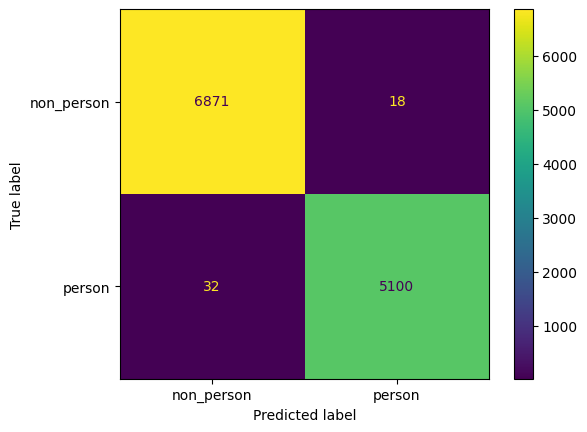

Độ chính xác trên tập huấn luyện:  0.9985440931780366
Độ chính xác trên tập Validation:  0.9958402662229617
Độ chính xác trên tập kiểm thử:  0.995840612261875
Tỷ lệ phát hiện không phải tên người: 0.997387
Tỷ lệ phát hiện tên người: 0.993765


In [29]:
import xgboost
best_model = train_model(xgboost.XGBClassifier(tree_method='gpu_hist', gpu_id=0), 
                         X_data_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char, y_test, is_neuralnet=False)

Độ chính xác trên tập dữ liệu thực tế:  0.9959349593495935
Tỷ lệ phát hiện không phải tên người: 0.995902
Tỷ lệ phát hiện tên người: 1.000000


/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


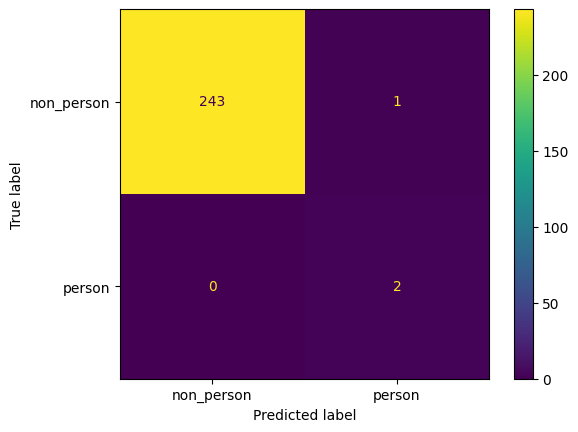

In [30]:
real_y = np.array(real_y.values, dtype = "int")
real_predictions = best_model.predict(real_tfidf_ngram_char)
real_predictions_proba = best_model.predict_proba(real_tfidf_ngram_char)
print("Độ chính xác trên tập dữ liệu thực tế: ", metrics.accuracy_score(real_predictions, real_y))
tn, fp, fn, tp = confusion_matrix(real_y, real_predictions).ravel()
tnr = tn/(tn + fp)
print("Tỷ lệ phát hiện không phải tên người: %f" % tnr)
tpr = tp / (tp + fn)
print("Tỷ lệ phát hiện tên người: %f" % tpr)

plot_confusion_matrix(best_model, real_tfidf_ngram_char, real_y, display_labels=["non_person", "person"])
plt.grid(False)
plt.show()

In [31]:
results = pd.DataFrame([real_x, real_y, real_predictions, real_predictions_proba[:,0]]).transpose()
results.columns = ["name", "Nhãn", "Kết quả dự đoán", "khả năng non_person"]
results.head()

,name,Nhãn,Kết quả dự đoán,khả năng non_person
0,ho kd cua hang kdth ngoc duc,0,0,0.999997
1,ct tnhh dt va tm minh phuong nam hn,0,0,0.999916
2,doan tncshcm truong dhbk hn,0,0,0.999411
3,dn tu nhan thao hung,0,0,0.998336
4,ct rpbm khu nha o cbqd,0,0,0.999527


In [28]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 2.9 MB/s eta 0:00:0000:0100:02


In [2]:
class NameClassifier:
    def __init__(self,model_path):
        self.model = pickle.load(open(model_path, 'rb'))
    def preprocessing(self,real_x):
        data_train = pd.read_csv("/home/trung/Documents/AI/name_classifier/name_classification/data_train_moredata5.csv")
        x_train = data_train["name"]
        # ngram-char level - we choose max number of words equal to 30000 except all words (100k+ words)
        tfidf_vect_ngram_char = TfidfVectorizer(analyzer='char', max_features=30000, ngram_range=(2, 3))
        tfidf_vect_ngram_char.fit(x_train)
        # assume that we don't have test set before
        real_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(real_x)
        return real_tfidf_ngram_char
    def predict_to_csv(self,real_x,real_y,file_path_export):
        real_tfidf_ngram_char = self.preprocessing(real_x)
        real_y = np.array(real_y.values, dtype = "int")
        real_predictions = self.model.predict(real_tfidf_ngram_char)
        real_predictions_proba = self.model.predict_proba(real_tfidf_ngram_char)
        results = pd.DataFrame([real_x, real_y, real_predictions, real_predictions_proba[:,0]]).transpose()
        results.columns = ["name", "label", "Prediction result", "prob non_person"]
        results.to_csv(file_path_export)
        f = open(file_path_export,'a',encoding="utf-8")
        f.write("Accuracy on real data: "+ str(accuracy_score(real_predictions, real_y))+'\n')
        tn, fp, fn, tp = confusion_matrix(real_y, real_predictions).ravel()
        tnr = tn/(tn + fp)
        f.write(("ACC non person name: %f" % tnr)+'\n')
        tpr = tp / (tp + fn)
        f.write(("Acc person name: %f" % tpr)+'\n')
        f.close()
        return file_path_export
    def predict_to_csv_non_statistic(self,real_x,file_path_export):
        real_tfidf_ngram_char = self.preprocessing(real_x)
        real_predictions = self.model.predict(real_tfidf_ngram_char)
        real_predictions_proba = self.model.predict_proba(real_tfidf_ngram_char)
        results = pd.DataFrame([real_x, real_predictions, real_predictions_proba[:,0]]).transpose()
        results.columns = ["name", "Prediction result", "prob non_person"]
        results.to_csv(file_path_export)
        return file_path_export

In [5]:
import pickle
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from unidecode import unidecode
from sklearn.metrics import confusion_matrix,accuracy_score
import xgboost as xgb

def preprocessing(real_x):
    data_train = pd.read_csv("data_train_moredata5.csv")
    x_train = data_train["name"]
    
    tfidf_vect_ngram_char = TfidfVectorizer(analyzer='char', max_features=30000, ngram_range=(2, 3))
    tfidf_vect_ngram_char.fit(x_train)
    
    real_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(real_x)
    return real_tfidf_ngram_char

def predict_to_csv_non_statistic(real_x,file_path_export):
    real_tfidf_ngram_char = preprocessing(real_x)
    real_predictions = model.predict(real_tfidf_ngram_char)
    real_predictions_proba = model.predict_proba(real_tfidf_ngram_char)
    results = pd.DataFrame([real_x, real_predictions, real_predictions_proba[:,0]]).transpose()
    results.columns = ["name", "Prediction result", "prob non_person"]
    results.to_csv(file_path_export)
    return file_path_export

In [6]:
model = xgb.XGBClassifier()
model.load_model("best_model.h5")



# real_data = pd.read_excel('/home/trung/Documents/AI/name_classifier/name_classification/1.xlsx')


# full_name = []
# for i in real_data.index:
#     print("processing",i)
#     try:
#         full_name.append(unidecode(real_data['HOTEN'][i]).lower())
#     except:
#         print("error at ",i)
#         real_data['name'][i] = 'error'
#         full_name.append(unidecode(real_data["name"][i]).lower())


# real_data = pd.DataFrame([full_name])
# real_data= real_data.transpose()
# real_data.columns = ["name"]
# real_x = real_data["name"]
# file_path_export = "reslut_testing.csv"
# name_classification.predict_to_csv_non_statistic(
#     real_x, file_path_export)




In [29]:
#rule-based
rule_name = open('/home/trung/Documents/AI/name_classifier/name_classification/person','r')
rule_name = rule_name.read()
rule_name_list = rule_name.split("\n")
del rule_name_list[-1]

In [31]:
rule_name_list

['nguyen',
 'hoang',
 'tran',
 'dang',
 'pham',
 'giap',
 'bach',
 'ngoc',
 'chau',
 'dinh',
 'huynh',
 'le',
 'nghiem',
 'phung',
 'ngo',
 'linh',
 'phan',
 'do']

In [32]:
rule_no_name = open('/home/trung/Documents/AI/name_classifier/name_classification/non_person','r')
rule_no_name = rule_no_name.read()
rule_no_name_list = rule_no_name.split("\n")
del rule_no_name_list[-1]

In [33]:
rule_no_name_list

['not used',
 'notused',
 'not use',
 'notuse',
 'noname',
 'khong su dung',
 'khongsu dung',
 'khongsudung',
 'khong sudung',
 'trading']

In [41]:
data = pd.read_csv("result_testing01.csv")
data

,Unnamed: 0,name,Prediction result,pro non_persion
0,0,mai duc chien mai khac chien,0,0.500975
1,1,cao thi hien,1,0.002633
2,2,nguyen phuong nam,1,0.000860
3,3,nguyen thi my loc,1,0.005762
4,4,nguyen hoai phong,1,0.001746
...,...,...,...,...
9995,9995,bach thi hue,1,0.002922
9996,9996,ta kim ly,1,0.094044
9997,9997,pham minh anh,1,0.004048
9998,9998,hoang ngoc anh nhi,1,0.100574


In [39]:
def has_special_char(s):
    for c in s:
        if not (c.isalpha() or c == ' '):
            return True
    return False

def has_one_word(s):
    if " " not in s:
        return True
    return False

s = "hello world"

has_one_word(s)

False

In [43]:
for i in range(len(data)):
    if data['Prediction result'][i] == 0:
        if data['pro non_persion'][i] > 0.5 and data['pro non_persion'][i] < 0.8:
            for rule_name in rule_name_list:
                if rule_name in data['name'][i]:
                    data['Prediction result'][i] = 1

    elif data['Prediction result'][i] == 1:
        if has_special_char(data['name'][i]) == True or has_one_word(data['name'][i]) == True:
            data['Prediction result'][i] = 0
        for rule_no_name in rule_no_name_list:
            if rule_no_name in data['name'][i]:
                data['Prediction result'][i] = 0
data.to_csv("op1.csv")
#end-rule_based

/tmp/ipykernel_6201/2430543777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction result'][i] = 1
/tmp/ipykernel_6201/2430543777.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction result'][i] = 0
/tmp/ipykernel_6201/2430543777.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction result'][i] = 0


In [34]:
results.to_csv("results_realdata_08122022_ver2_testing.csv")

In [35]:
from keras.layers import *
from keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

def create_dnn_model():
    input_layer = Input(shape=(300,))
    layer = Dense(512, activation='relu')(input_layer)
    layer = Dense(216, activation='relu')(layer)
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/20
85/85 [==============================] - 2s 14ms/step - loss: 0.1904 - accuracy: 0.9315 - val_loss: 0.0416 - val_accuracy: 0.9888
Epoch 2/20
85/85 [==============================] - 1s 12ms/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 3/20
85/85 [==============================] - 1s 11ms/step - loss: 0.0293 - accuracy: 0.9917 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 4/20
85/85 [==============================] - 1s 11ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0334 - val_accuracy: 0.9904
Epoch 5/20
85/85 [==============================] - 1s 11ms/step - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.0310 - val_accuracy: 0.9917
Epoch 6/20
85/85 [==============================] - 1s 11ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.0334 - val_accuracy: 0.9896
Epoch 7/20
85/85 [==============================] - 1s 11ms/step - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 8/20
85

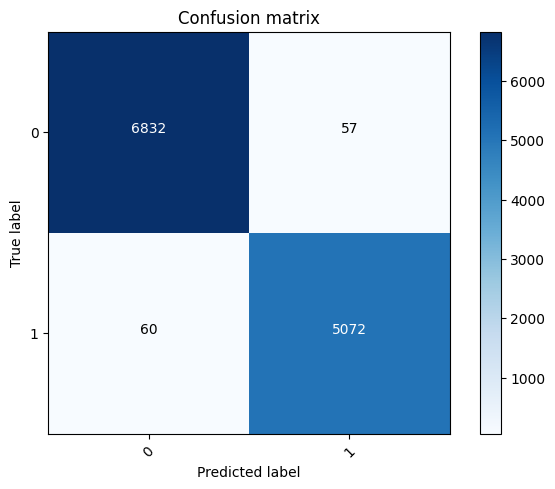

Độ chính xác trên tập huấn luyện:  0.9989600665557404
Độ chính xác trên tập Validation:  0.9908485856905158
Độ chính xác trên tập kiểm thử:  0.9902670326927876
Tỷ lệ phát hiện không phải tên người: 0.991726
Tỷ lệ phát hiện tên người: 0.988309


In [36]:
class_weight = {0: 1.0,
                1: 1.0}
classifier = create_dnn_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [37]:
## LSTM model
def create_lstm_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = LSTM(128, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/20
85/85 [==============================] - 8s 70ms/step - loss: 0.4820 - accuracy: 0.7520 - val_loss: 0.1911 - val_accuracy: 0.9324
Epoch 2/20
85/85 [==============================] - 6s 74ms/step - loss: 0.1292 - accuracy: 0.9539 - val_loss: 0.1947 - val_accuracy: 0.9218
Epoch 3/20
85/85 [==============================] - 6s 70ms/step - loss: 0.0902 - accuracy: 0.9683 - val_loss: 0.0792 - val_accuracy: 0.9755
Epoch 4/20
85/85 [==============================] - 5s 62ms/step - loss: 0.0692 - accuracy: 0.9770 - val_loss: 0.0799 - val_accuracy: 0.9725
Epoch 5/20
85/85 [==============================] - 5s 61ms/step - loss: 0.0622 - accuracy: 0.9791 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 6/20
85/85 [==============================] - 5s 61ms/step - loss: 0.0539 - accuracy: 0.9825 - val_loss: 0.0556 - val_accuracy: 0.9834
Epoch 7/20
85/85 [==============================] - 8s 89ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0496 - val_accuracy: 0.9856
Epoch 8/20
85

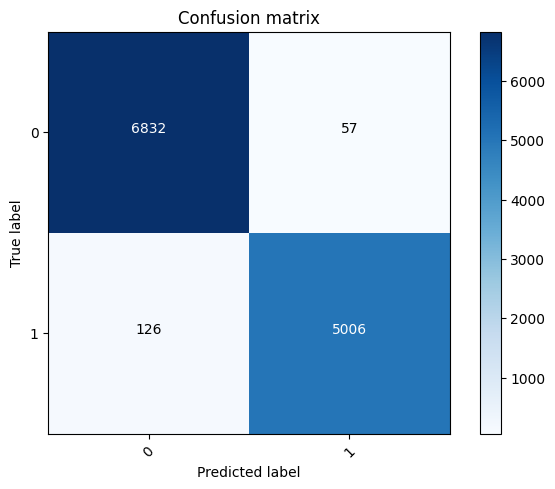

Độ chính xác trên tập huấn luyện:  0.9937141800702533
Độ chính xác trên tập Validation:  0.9877287853577371
Độ chính xác trên tập kiểm thử:  0.9847766408784627
Tỷ lệ phát hiện không phải tên người: 0.991726
Tỷ lệ phát hiện tên người: 0.975448


In [38]:
classifier = create_lstm_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True,n_epochs=20)

In [39]:
# GRU model
def create_gru_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = GRU(128, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/20
85/85 [==============================] - 8s 70ms/step - loss: 0.6067 - accuracy: 0.6524 - val_loss: 0.4292 - val_accuracy: 0.8203
Epoch 2/20
85/85 [==============================] - 6s 67ms/step - loss: 0.2222 - accuracy: 0.9161 - val_loss: 0.1359 - val_accuracy: 0.9563
Epoch 3/20
85/85 [==============================] - 5s 56ms/step - loss: 0.1068 - accuracy: 0.9650 - val_loss: 0.0841 - val_accuracy: 0.9730
Epoch 4/20
85/85 [==============================] - 4s 53ms/step - loss: 0.0789 - accuracy: 0.9740 - val_loss: 0.1270 - val_accuracy: 0.9590
Epoch 5/20
85/85 [==============================] - 4s 53ms/step - loss: 0.0707 - accuracy: 0.9771 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 6/20
85/85 [==============================] - 5s 60ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0912 - val_accuracy: 0.9669
Epoch 7/20
85/85 [==============================] - 5s 59ms/step - loss: 0.0599 - accuracy: 0.9809 - val_loss: 0.0551 - val_accuracy: 0.9840
Epoch 8/20
85

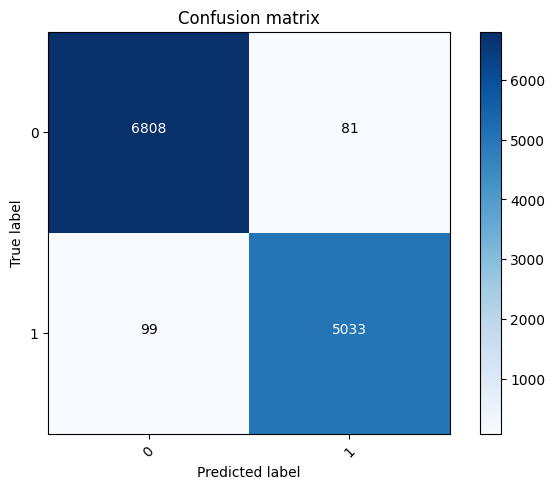

Độ chính xác trên tập huấn luyện:  0.9923507117766686
Độ chính xác trên tập Validation:  0.9885607321131448
Độ chính xác trên tập kiểm thử:  0.9850262041427502
Tỷ lệ phát hiện không phải tên người: 0.988242
Tỷ lệ phát hiện tên người: 0.980709


In [40]:
classifier = create_gru_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [41]:
# Bidirectional RNN model
def create_brnn_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(GRU(128, activation='relu'))(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/20
85/85 [==============================] - 12s 103ms/step - loss: 0.3348 - accuracy: 0.8552 - val_loss: 0.2462 - val_accuracy: 0.8975
Epoch 2/20
85/85 [==============================] - 7s 87ms/step - loss: 0.1045 - accuracy: 0.9634 - val_loss: 0.0796 - val_accuracy: 0.9711
Epoch 3/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 0.0502 - val_accuracy: 0.9834
Epoch 4/20
85/85 [==============================] - 7s 78ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0419 - val_accuracy: 0.9875
Epoch 5/20
85/85 [==============================] - 7s 78ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0403 - val_accuracy: 0.9881
Epoch 6/20
85/85 [==============================] - 7s 86ms/step - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.0487 - val_accuracy: 0.9834
Epoch 7/20
85/85 [==============================] - 7s 88ms/step - loss: 0.0304 - accuracy: 0.9912 - val_loss: 0.0373 - val_accuracy: 0.9894
Epoch 8/20


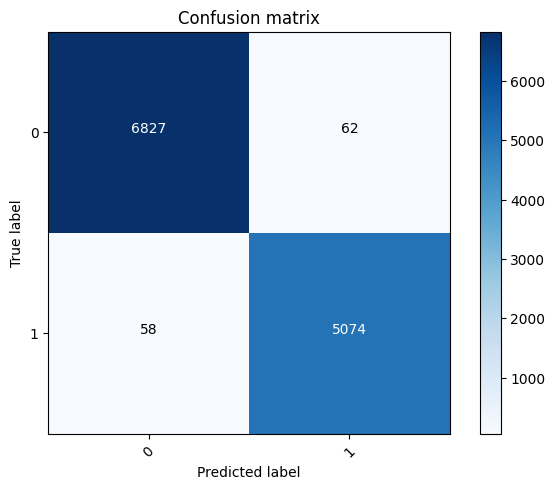

Độ chính xác trên tập huấn luyện:  0.9963024588648549
Độ chính xác trên tập Validation:  0.9923044925124792
Độ chính xác trên tập kiểm thử:  0.9900174694285001
Tỷ lệ phát hiện không phải tên người: 0.991000
Tỷ lệ phát hiện tên người: 0.988698


In [42]:
classifier = create_brnn_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [43]:
# Recurrent Convolutional Neural Network
def create_rcnn_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(GRU(128, activation='relu', return_sequences=True))(layer)    
    layer = Convolution1D(100, 3, activation="relu")(layer)
    layer = Flatten()(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    classifier.summary()
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 300)]             0         
                                                                 
 reshape_3 (Reshape)         (None, 10, 30)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 256)          122880    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 8, 100)            76900     
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               410112    
                                                           

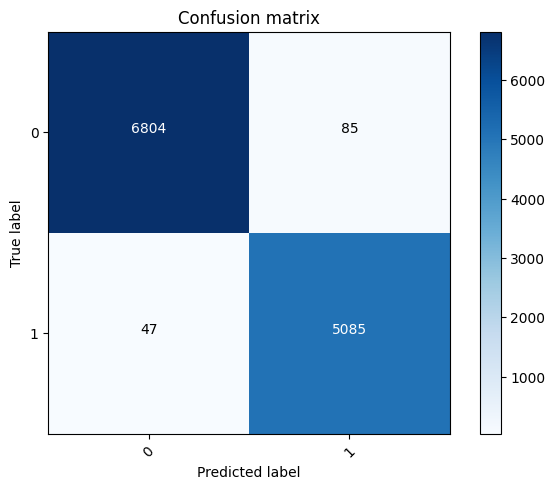

Độ chính xác trên tập huấn luyện:  0.9967184322425587
Độ chính xác trên tập Validation:  0.9910565723793677
Độ chính xác trên tập kiểm thử:  0.9890192163713502
Tỷ lệ phát hiện không phải tên người: 0.987661
Tỷ lệ phát hiện tên người: 0.990842


In [44]:
classifier = create_rcnn_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [45]:
# Doc2Vec Model

def get_corpus(documents):
    corpus = []
    
    for i in tqdm(range(len(documents))):
        doc = documents[i]
        
        words = doc.split(' ')
        tagged_document = gensim.models.doc2vec.TaggedDocument(words, [i])
        
        corpus.append(tagged_document)
        
    return corpus
train_corpus = get_corpus(x_train)

100%|██████████| 48080/48080 [00:00<00:00, 57686.93it/s] 


In [46]:
test_corpus = get_corpus(x_test)

100%|██████████| 12021/12021 [00:00<00:00, 115808.39it/s]


In [47]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, epochs=40)
model.build_vocab(train_corpus)

In [48]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 2min 47s, sys: 31.7 s, total: 3min 19s
Wall time: 2min 44s


In [49]:
X_data_vectors = []
for x in train_corpus:
    vector = model.infer_vector(x.words)
    X_data_vectors.append(vector)
    
X_test_vectors = []
for x in test_corpus:
    vector = model.infer_vector(x.words)
    X_test_vectors.append(vector)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


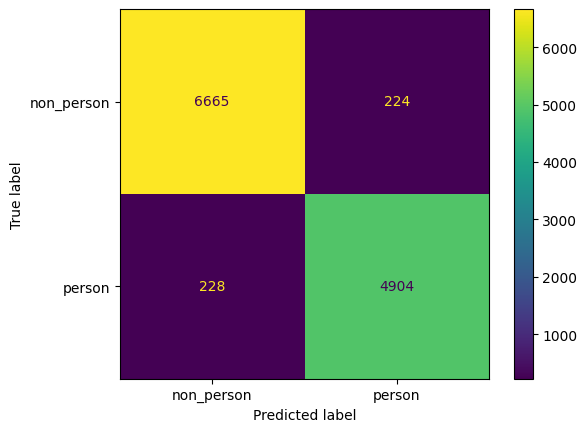

Độ chính xác trên tập huấn luyện:  0.997712146422629
Độ chính xác trên tập Validation:  0.9571547420965059
Độ chính xác trên tập kiểm thử:  0.9623991348473505
Tỷ lệ phát hiện không phải tên người: 0.967484
Tỷ lệ phát hiện tên người: 0.955573


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [50]:
classifier = xgboost.XGBClassifier(tree_method='gpu_hist', gpu_id=0)
train_model(classifier=classifier, X_data=np.array(X_data_vectors), y_data=y_data_n, X_test=np.array(X_test_vectors), y_test=y_test_n, is_neuralnet=False, n_epochs=20)